主成分分析  
→データの散布図にそれっぽい線を引いて説明する  
　そのためにできるだけ次元を削減する

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

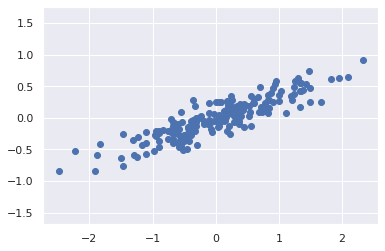

In [ ]:
#適当なデータを作る
#線形になってる
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
#主成分分析でだいたいの線を見つける
#sklearnの主成分分析は from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#n_componentsで何次元に圧縮するか(何次元で説明するか)
pca.fit(X)

PCA(n_components=2)

In [ ]:
#主成分を表示
#固有ベクトルになっている
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
#固有値
print(pca.explained_variance_)

[0.7625315 0.0184779]


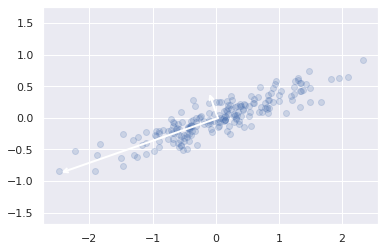

In [ ]:
#上の2つを図示してみる
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#確かにベクトルになってる
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

次元削減

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
#2次元→1次元に削減された

original shape:    (200, 2)
transformed shape: (200, 1)


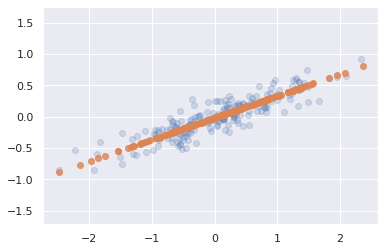

In [ ]:
#プロットしてみる
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

手書き数字

In [ ]:
#手書き数字データセット
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
#画像なので64次元だったのを2次元に削減
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


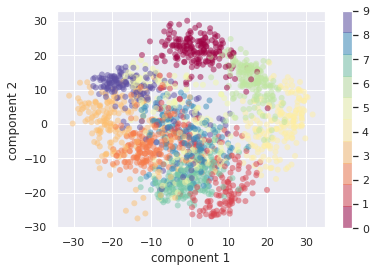

In [ ]:
#主成分ごとにデータを表示
#それぞれの色は数字を表す
#1,2,3,4,6あたりはうまくいってるように見える
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap = plt.get_cmap("Spectral",10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

どのくらいまで次元を削減すればいいのか

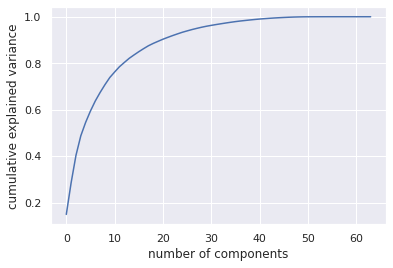

In [ ]:
#寄与率を表示
#縦が寄与率で横が主成分の数
#10個の主成分でだいたい8割説明できることになる
pca = PCA().fit(digits.data)
#pca.explained_variance_ratio_で寄与率
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');